<div style="display: flex; align-items: center;">
    <img src="static/logo_rs.png" width="120" height="120">
    <h1> Progetto SMDA - User interest Recommendation System </h1>
</div>

<p>
    Questo sistema di raccomandazione è frutto delle conoscenze acquisite al corso di Social Media Data Analisys AA 2023-2024. Si pone come obiettivo quello di "Raccomandare" persone simili tra loro in base ai dati presi in esame.
</p>

<h2>Sommario</h2>
<ol>
    <li><a href="#teoria">Teoria</a>
    <li><a href="#introduzione">Introduzione al progetto</a>
    <li><a href="#analisi">Analisi dei dati</a>
    <li><a href="#sistema">Sistema di raccomandazione</a>
    <li><a href="#risultati">Risultati</a>
    <li><a href="#conclusione">Conclusione</a>
</ol>

<section id="teoria">
    <h1>1. Teoria</h1>
</section>

_**I sistemi di raccomandazione**_ sono una classe di sistemi che implicano la
predizione delle risposte dell'utente a delle opzioni, o in generale, le
preferenze di un utente rispetto a specifici oggetti (items) sulla base delle
preferenze espresse in passato. L'idea principale dietro i sistemi di
raccomandazione è la seguente:

- L'utente interagisce con gli oggetti;
- In base a tali oggetti, il sistema crea un modello di preferenze per l'utente;
- Il modello permette di predire la reazione dell'utente a nuovi oggetti;
- Il sistema cerca quali oggetti sono potenzialmente interessanti per l'utente;
- Il sistema raccomanda oggetti interessanti all'utente;

Esistono due principali gruppi di sistemi di raccomandazione:   

```Sistemi content-based```, che effettuano suggerimenti ad un utente sulla
base delle proprietà di altri item con cui l'utente ha interagito.      

```Sistemi collaborative filtering```, che effettuano suggerimenti ad un
utente sulla base degli item piaciuti ad utenti ad esso simili.

## Definizione del problema

Sia ``` X ``` l'insieme degli utenti  ed ```S``` l'insieme degli item. Lo scopo di un sistema di raccomandazione è quello di assegnare un valore ad una coppia ```utente-item (x, s) ∈ X x S```
che quantificherà quanto all'utente ```x``` possa piacere
l'item ``` s ```. Definiremo quindi una ```Utility Function``` (funzione di utilità) come
segue:
<div align='center'>  u: X x S -> R  </div>

Dove ```R``` è l'insieme del rating, ovvero un insieme totalmente ordinato.
Esistono molte varianti di rating:

- rating compreso tra stelle ```0 - 5 stelle ```
- rating normalizzato compreso in ```[0,1]```
- rating binario ```{0,1}``` (mi piace, non mi piace)

Questa funzione determina uno score, rappresentante la preferenza dell'utente sull'oggetto in esame. L'obiettivo è predire questo score attraverso la coppia utente-item, permettendo di valutare l'utilità del prodotto per l'utente.
   


## Utility Matrix

Un sistema di raccomandazione si basa su un insieme di preferenze
conosciute espresse da utenti per oggetti o item, che può essere rappresentato
da una ```Matrice di Utilità``` ```M```(talvolta chiamata U ). La matrice ```M``` è una
matrice ```users-items``` dove l'i-esima riga rappresenta l'utente  $x_i$ , l'i-esima
colonna rappresenta l'item $s_i$
ed ogni elemento $r_{i,j}$ della matrice rappresenta
il rating dell'utente $x_i$ rispetto all'item $s_j$.    

Essa rappresenta la conoscenza esistente del sistema sulla relazione tra utenti
ed articoli ed è perlopiù sparsa poiché un generico utente recensisce /
interagisce con pochi item. Un sistema di raccomandazione vuole predire i
valori di rating inesistenti della matrice.

<div style="display: flex; align-items: center; justify-content: center">
    <img src="static/image_1.png" width="600" height="400">
</div> 

### Problemi chiave
Quando progettiamo un sistema di raccomandazione, incontreremo due
problemi principali: la popolazione della matrice di utilità e la predizione di
rating non ancora conosciuti.

### Popolare la matrice di utilità
Se la matrice di utilità è vuota, è impossibile effettuare delle raccomandazioni. Ci sono due metodi pincipali per popolare la matrice di
utilità: metodo esplicito e metodo implicito. I due approcci possono essere
utilizzati in contemporanea.

L'approccio **esplicito** consiste nel chiedere all'utente di recensire gli item (i.e. Netflix ai nuovi utenti). Tuttavia, questo approccio stanca ed infastidisce facilmente gli utenti, che potrebbero cambiare piattaforma o inserire suggerimenti casuali. Inoltre, le valutazioni sono generalmente influenzate
dal fatto che sono fornite da persone disposte a fornirle (che di solito è una
piccola parte dell'intero gruppo di utenti).

L'approccio **implicito** fa inferenza dal comportamento dell'utente. Ad esempio lo storico delle visite a certi item, lo storico degli acquisti, le
interazioni con l'oggetto etc. In generale, lo storico di ricerca è utilizzato per
fare inferenza sulle categorie di item di interesse.

# Sistemi Content-Based
L'idea principale dietro i sistemi Content-Based è quella di raccomandare all'utente ```x``` degli item simili ad item recensiti precedentemente con un buon rating. Ad esempio:    
- Raccomandare film con gli stessi attori, dello stesso regista o dello stesso genere.
- Raccomandare news con contenuto simile (i.e. politica,cucina, sport)

**Step 1.** Dato un utente, il punto di partenza è costituito dagli item da esso
recensiti. Ogni item è descritto da vari attributi. Per ogni item recensito viene
costruito un profilo, ovvero un vettore di valori dove ogni valore è riferito ad
un attributo. Ipotizziamo che gli item siano film, allora gli attributi possono
essere i vari generi (thriller, romantico, horror, azione, etc).    

**Step 2.** Viene costruito uno *user profile* (profilo dell'utente) a partire dai
profili degli item recensiti, che rappresenti il grado medio di preferenza
dell'utente rispetto ai vari attributi. Ad esempio, l'utente potrebbe preferire
film di azione e romantici e valutare negativamente gli horror.     

**Step 3.** Dato un item non ancora recensito dall'utente, viene generato il
profilo dell'item e confrontato con lo user profile. Da una certa nozione di
similarità tra profili si inferisce se all'utente possa piacere o meno l'item.

**_I problemi più rilevanti sono:_** la scelta delle proprietà principali, la
costruzione del profilo utente, il calcolo della similarità tra due profili.


#### Estrazione delle features
Può essere **Manuale** attraverso le API per ottenere informazioni specifiche.
**Automatica** utilizzando tecniche come TF-IDF

#### Profilo di un utente
Partendo dalle valutazioni già effettuate dall'utente su altri item, occorre
aggregare in qualche modo le valutazioni che riguardano item che
condividono la stessa proprietà. La funzione di aggregazione più semplice è
la **media delle valutazioni**.

#### Similarità tra profili
Per calcolare la similarità tra profili è possibile utilizzare qualsiasi misura di
similarità tra vettori. La misura più utilizzata è la ```Similarità del Coseno```, che
equivale al coseno dell'angolo formato dai due vettori.

$$\cos(\theta) = \frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\| \|\mathbf{B}\|} = \frac{\sum_{i=1}^{n} A_i B_i}{\sqrt{\sum_{i=1}^{n} A_i^2} \cdot \sqrt{\sum_{i=1}^{n} B_i^2}}

$$



# Sistemi Collaborative Filtering
Effettuano suggerimenti ad un
utente sulla base degli item piaciuti ad utenti ad esso simili.
Sono di due tipi: ```USER-USER``` e ```ITEM-ITEM```

## Sistemi user-user collaborative filtering
L'idea principale dietro ai Collaborative Filters è la seguente: gli item da
suggerire all'utente ```x``` sono quelli valutati in maniera positiva da utenti simili ad esso
ad . Tale sistema è incentrato maggiormente sul comportamento degli utenti piuttosto che sugli item.

#### Similarità tra utenti
Il profilo dell'utente in questo caso è rappresentato dalla corrispondente riga nella ```matrice di utilità``` ```M```, dove alle entry vuote viene associato il valore 0.
Per calcolare la similarità tra utenti è possibile utilizzare nuovamente la ```Similarità del coseno```, in alternativa, si possono utilizzare:
- il ```Coefficiente di Pearson```     
$$r = \frac{\sum_{i=1}^{n} (X_i - \overline{X})(Y_i - \overline{Y})}{\sqrt{\sum_{i=1}^{n} (X_i - \overline{X})^2} \sqrt{\sum_{i=1}^{n} (Y_i - \overline{Y})^2}}$$

- la ```Similarità di Jaccard``` (caso binario {0,1})
 $$J(A, B) = \frac{|A \cap B|}{|A \cup B|}$$

## Sistemi item-item collaborative filtering
Si consideri l'utente $x_i$ ed un item $s_j$ non valutato da $x_i$. Si consideri come profilo $I_j$ dell'item $s_j$ la colonna $j$-esima della matrice di utilità, normalizzata
sottraendo la media delle valutazioni degli utenti. Si trovino gli $N$ item più simili ad $s_j$ e valutati dall'utente $x_i$, utilizzando la distanza del coseno (o il
coefficiente di Pearson). A questo punto si stimi la valutazione dell'utente $x_i$ rispetto all'item  $s_j$ attraverso la media dei rating dati dall'utente $x_i$ agli $N$ item più simili ad $s_j$ , pesata con lo score di similarità. Il risultato sarà la valutazione predetta.

Tale schema differisce dai sistemi content-based in quanto il profilo dell'item
non è costruito attraverso gli attributi dell'item stesso, bensì attraverso le
valutazioni degli utenti nella matrice di utilità. Nella pratica, i sistemi Item-Item funzionano meglio poiché gli utenti tendono ad avere preferenze diverse.

### Confronto tra collaborative filters
Le due strategie comportano un trade-off tra efficienza ed accuratezza. Lo schema basato sulla similarità degli item è più informativo e permette di
ottenere predizioni più affidabili. Questo poiché vi sono generalmente più item che utenti nella matrice di utilità ed è più facile trovare item dello stesso
genere che utenti a cui piacciono solo item di un certo genere (il profilo di un
utente è quasi univoco).

Lo schema basato sulla similarità tra utenti è tuttavia più efficiente se vogliamo predire tutti i rating dell'utente $x$. Questo è conseguenza del fatto
che una riga della matrice di utilità ha molte entry vuote. Utilizzando lo schema basato sugli utenti è sufficiente individuare l'insieme degli utenti simili ad $x$ per stimare il rating di vari item non valutati da  $x$. Nel sistema
item-item, per ogni item non valutato è necessario ri-calcolare la similarità.


<section id="introduzione">
    <h1>2. Introduzione al progetto</h1>
</section>

<p>
I dati utilizzati per questo sistema sono stati ottenuti da un dataset esistente acquisito da Kaggle. I dati sono stati precedentemente puliti e organizzati secondo le necessità del progetto. Il dataset originale conteneva valori di analisi effettuati dagli autori, che sono stati rimossi poiché non inerenti al lavoro svolto in questo progetto.
</p>
<p>
Il sistema di raccomandazione che segue è un sistema Collaborative Filtering di tipo User-User.
</p>
<p>
Il dataset contiene le seguenti colonne:
<ul>
    <li><b>Gender</b>: Genere dell' utente: Uomo (0) - Donna (1)</li>
    <li><b>Age</b>: Età dell'utente<//li>
    <li><b>Field</b>: Campo professionale</li>
    <li><b>From</b>: Provenienza</li>
    <li><b>Income</b>: Reddito</li>
    <li><b>Career</b>: Occupazione lavorativa</li>
</ul>
<p>
I seguenti campi riguardano le valutazioni in scala da 0 a 10 date dagli utenti ad alcune caratteristiche che considerano importanti in un ipotetico partner.
</p>
<ul>
    <li><b>Attr</b>: Attrattività</li>              
    <li><b>Sinc</b>: Sincerità </li>
    <li><b>Intel</b>: Intelligenza</li>
    <li><b>Fun</b>: Simpatia</li>
    <li><b>Amb</b>: Ambizione</li>
    <li><b>Shar</b>: Condivisione degli stessi interessi </li>
</ul>
<p>
I seguenti campi invece riguardano gli interessi in alcuni ambiti da parte degli utenti, anche questi valutati da una scala di che va da 0(non mi piace per niente) a 10(è una delle mie cose preferite)
</p>
<ul>
    <li><b>Sports</b>: Quanto è importante praticare sport? </li>
    <li><b>Exercise</b>: Quanto ti piace fare esercizio fisico?</li>
    <li><b>Dining</b>: Quanto ti piace Pranzare/Cenare fuori?</li>
    <li><b>Museums</b>: Quanto ti piace partecipare a mostre o eventi?</li>
    <li><b>Art</b>: Quanto ti piace l'arte?</li>
    <li><b>Hiking</b>: Quanto è importante fare Hiking?</li>
    <li><b>Gaming</b>: Quanto ti piacciono i videogiochi?</li>
    <li><b>Clubbing</b>: Quanto ti piace andare a ballare in discoteca?</li>
    <li><b>Reading</b>: Quanto ti piace leggere?</li>
    <li><b>Tv</b>: Quanto ti piace guardare la tv?</li>
    <li><b>Theater</b>: Quanto ti piace andare al cinema?</li>
    <li><b>Movies</b>: Quanto ti piace guardare film?</li>
    <li><b>Concerts</b>: Quanto ti piace andare ai concerti?</li>
    <li><b>Music</b>: Quanto ti piace la musica?</li>
    <li><b>Shopping</b>:Quanto ti piace andare a fare shopping?</li>
    <li><b>Yoga</b>: Quanto ti piace fare Yoga?</li>
</ul>
</p>

## Informazioni sul Dataset

Il dataset iniziale comprende 8378 entries per 28 colonne di dati.

In [1]:
import pandas as pd

path = 'datasets/data.csv'
data = pd.read_csv(path)

print("INFORMAZIONI SUL DATASET")
print("-----------------------------------------")
data_info = data.info()
print("-----------------------------------------")

INFORMAZIONI SUL DATASET
-----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    8378 non-null   int64  
 1   age       8283 non-null   float64
 2   field     8315 non-null   object 
 3   from      8299 non-null   object 
 4   income    4279 non-null   object 
 5   career    8289 non-null   object 
 6   attr      8176 non-null   float64
 7   sinc      8101 non-null   float64
 8   intel     8082 non-null   float64
 9   fun       8028 non-null   float64
 10  amb       7666 non-null   float64
 11  shar      7311 non-null   float64
 12  sports    8299 non-null   float64
 13  exercise  8299 non-null   float64
 14  dining    8299 non-null   float64
 15  museums   8299 non-null   float64
 16  art       8299 non-null   float64
 17  hiking    8299 non-null   float64
 18  gaming    8299 non-null   float64
 19  cl

<section id="analisi">
    <h1>3. Dati</h1>
</section>

## Preprocessing dei dati

In questa sezione effettueremo un preprocessing ai dati, andando a rimuovere le colonne superflue. inoltre effettueremo processi di ```Standardizzazione``` sui dati del dataset.
Troveremo una sezione apposita al ```Clustering``` dei dati che effettueremo tramite l'algoritmo ```K-Means```

### Rimozione colonne

In [2]:
#Rimozione colonne 'income' e 'from'
data.drop(columns=['income', 'from'], inplace=True)

data.to_csv('datasets/normalized_data_no_outliers.csv', index=False)

### Standardizzazione dei dati

La **standardizzazione** è una tecnica di preprocessing dei dati utilizzata per trasformare le caratteristiche di un dataset in modo che abbiano una *media* di 0 e una *deviazione standard* di 1. Questo processo consente di ridimensionare i dati, rendendo le diverse caratteristiche confrontabili, specialmente quando hanno scale o unità di misura diverse.

In [3]:
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('datasets/normalized_data_no_outliers.csv')

# Esclusione delle colonne 'age' e 'gender' dalla normalizzazione
columns_to_standardize = data.select_dtypes(include=['number']).columns.drop(['age', 'gender'])

# Rimozione degli outlier utilizzando il metodo IQR
Q1 = data[columns_to_standardize].quantile(0.25)
Q3 = data[columns_to_standardize].quantile(0.75)
IQR = Q3 - Q1

# Definizione dei limiti per considerare un valore un outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtraggio dei dati per rimuovere gli outlier
data_no_outliers = data[~((data[columns_to_standardize] < lower_bound) | 
                          (data[columns_to_standardize] > upper_bound)).any(axis=1)]

#Inizializzazione Scaler
scaler = StandardScaler()

# Standardizzazione
data_no_outliers.loc[:, columns_to_standardize] = scaler.fit_transform(data_no_outliers[columns_to_standardize])

data_no_outliers.to_csv('datasets/normalized_data_no_outliers.csv', index=False)


## Clustering
In questa sezione effettuaremo il clustering dei dati, utilizzando l'algoritmo K-Means in combinazione con la PCA.


Il *Clustering* è una tecnica utilizzata per raggruppare un insieme di dati in gruppi o cluster basati sulla somiglianza tra i dati stessi. L'obiettivo del clustering è organizzare i dati in modo che gli elementi all'interno di ciascun cluster siano più simili tra loro rispetto agli elementi di altri cluster.

La *PCA (Principal Component Analysis)* è una tecnica di riduzione della dimensionalità utilizzata per trasformare un dataset ad alta dimensionalità in un dataset con un numero inferiore di dimensioni, mantenendo quanta più varianza (informazione) possibile. L'obiettivo della PCA è semplificare l'analisi dei dati, riducendo il numero di variabili, pur preservando le caratteristiche principali che spiegano la maggior parte della variabilità nei dati.




## Assunzioni:
Abbiamo utilizzato il K-Means con un best K = 3, il che ci darà come risultato 3 cluster, all'interno di ogni cluster troveremo utenti con caratteristiche simili in base alla valutazioni date alle features.

### Metodo del Gomito
Per determinare il K ottimale, utilizzeremo il ```Metodo del Gomito```.     
Il metodo del gomito è una tecnica utilizzata per determinare il numero ottimale di cluster (𝑘) in un algoritmo di clustering, come il K-Means. L'idea alla base del metodo è di analizzare come varia la somma delle distanze quadrate interne ai cluster (chiamata SSE, Sum of Squared Errors, o inertia) al variare del numero di cluster.
#### Interpretazione:
- Con l'aumentare di 𝑘, l'inertia diminuisce poiché ogni cluster ha meno punti, ma dopo un certo punto l'aggiunta di ulteriori cluster porta a riduzioni marginali dell'inertia.
- Il gomito è il punto in cui il calo dell'inertia diventa meno pronunciato, suggerendo che aggiungere più cluster non migliora significativamente il modello

Come possiamo notare nel grafico ottenuto per il metodo del gomito, notiamo che la curva dove si forma il gomito è proprio quando il K = 3.

### Silhouette Score
Lo Score di Silhouette è una metrica utilizzata per *valutare* la qualità di un clustering. Misura quanto bene ogni punto dati è assegnato al proprio cluster rispetto agli altri cluster, combinando la coesione all'interno del cluster e la separazione dai cluster vicini.

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

Dove:
- \( a(i) \) è la distanza media tra il punto \( i \) e gli altri punti del suo stesso cluster (cohesione).
- \( b(i) \) è la distanza media tra il punto \( i \) e i punti del cluster più vicino (separazione).

L'intervallo di \( s(i) \) varia tra -1 e 1:
- \( s(i) = 1 \) indica che il punto è ben assegnato al cluster.
- \( s(i) = 0 \) indica che il punto si trova al confine tra due cluster.
- \( s(i) = -1 \) indica che il punto è probabilmente assegnato al cluster sbagliato.

*In base alla nostra analisi, il basso score di Silhouette potrebbe essere attribuito alla provenienza dei dati all'interno del dataset, che potrebbe aver introdotto eterogeneità o caratteristiche non ben separate tra i cluster. Tra i vari tentativi effettuati non si è riuscito ad ottenere uno score miglior di 0.357.     Considerando che il valore iniziale era di 0.12, che con i vari aggiustamente fatti nella scelta dei cluster e delle componenti principali il suo valore è quasi triplicato.* 


### Cluster ottenuti
<b>Cluster 0 :</b>
 Rappresenta persone con forti interessi accademici, orientati a studi specifici come il diritto o le scienze del clima. Questi individui tendono ad avere profili di attrattiva e sincerità variabili, ma condividono abitudini simili nelle attività culturali.

<b>Cluster 1 :</b>
Sembra includere persone con preferenze equilibrate per attività culturali, sociali e intellettuali. Questo cluster potrebbe rappresentare individui più coinvolti socialmente e con interessi ampi, ma provenienti da background simili a quelli del Cluster 0.

<b>Cluster 2 :</b>
Questo cluster sembra rappresentare persone più coinvolte nel mondo economico o finanziario, con una propensione a bilanciare intelligenza, divertimento e preferenze per attività legate al benessere e al consumismo.



Silhouette Scores: [np.float64(0.33856243239546974), np.float64(0.3576704273257263), np.float64(0.3281885586379125), np.float64(0.3032717674359067), np.float64(0.33446710111108285), np.float64(0.32199210658676686), np.float64(0.32925690373962185), np.float64(0.3164570770641248), np.float64(0.32641195458704897)]


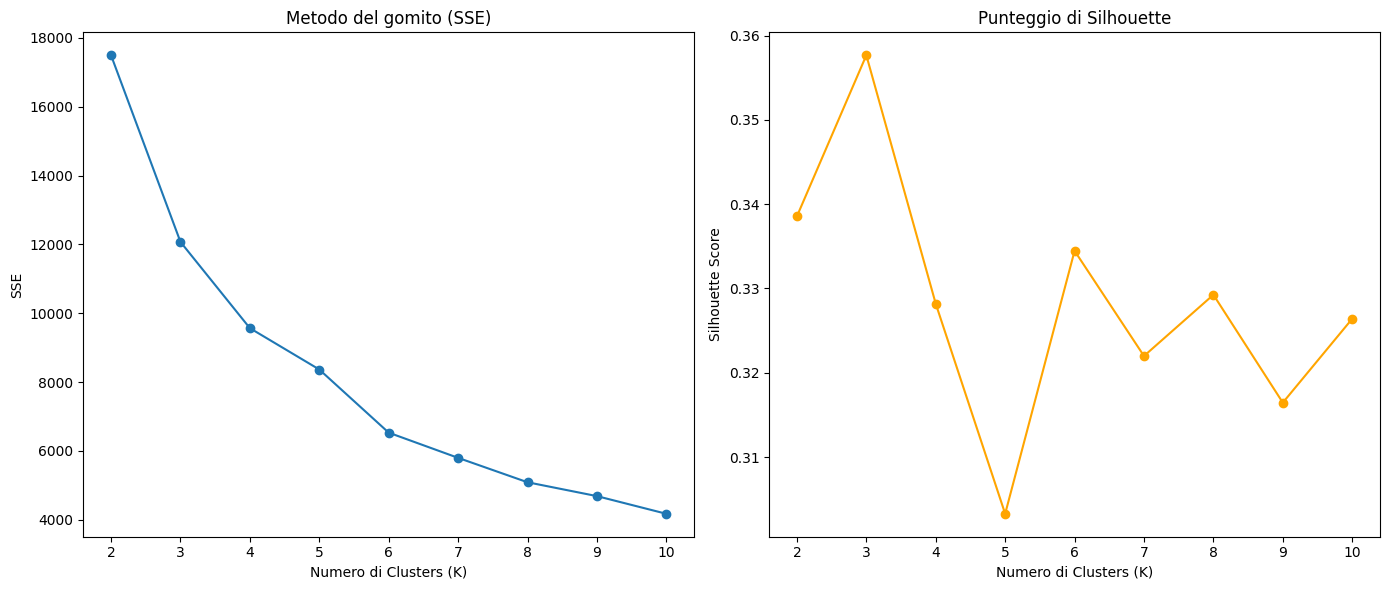

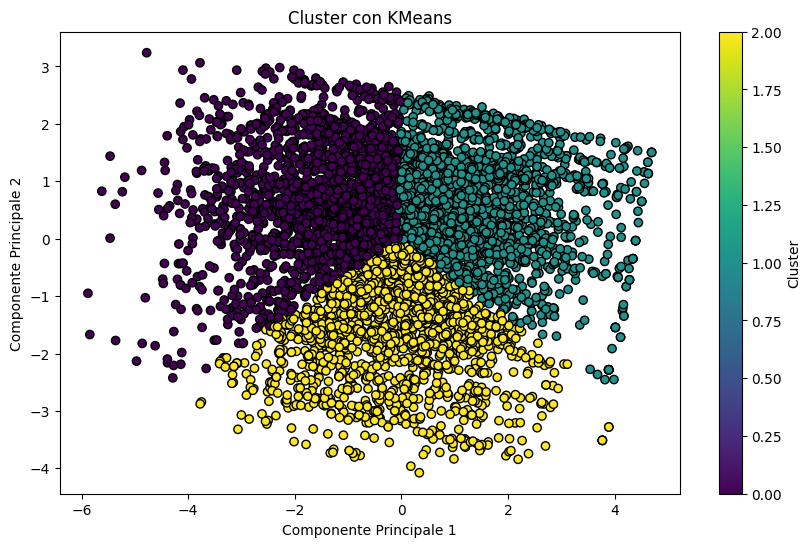

Cluster 0:
      gender   age             field  \
0          0  24.0               law   
2          0  24.0               law   
5          0  24.0               law   
8          0  24.0               law   
25         0  23.0               Law   
...      ...   ...               ...   
7266       1  25.0  Climate Dynamics   
7275       1  25.0  Climate Dynamics   
7276       1  25.0  Climate Dynamics   
7277       1  25.0  Climate Dynamics   
7285       1  25.0  Climate Dynamics   

                                                 career      attr      sinc  \
0                                                   law -0.664763 -0.186087   
2                                                   law -0.664763  0.445534   
5                                                   law  0.933251 -0.186087   
8                                                   law  0.400580 -0.817707   
25                                   lawyer/policy work -0.664763  1.708775   
...                               

In [4]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

data = pd.read_csv('datasets/normalized_data_no_outliers.csv')
data = data.dropna()  # Rimozione delle righe con valori NaN

# Colonne potenzialmente più influenti all'interno del set di dati
columns_to_standardize = ['art', 'reading', 'attr', 'museums', 'sinc', 'fun', 'amb', 'shar']

# Standardizzazione dei dati
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[columns_to_standardize])

# Test del numero di componenti PCA
n_components_pca =2  
pca = PCA(n_components=n_components_pca)
pca_data = pca.fit_transform(scaled_data)

# Inizializzazione delle metriche per la valutazione del clustering
sse = []
silhouette_scores = []
k_range = range(2, 11)

# Test dei k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_data)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_data, labels))

print("Silhouette Scores:",silhouette_scores)

# Plot delle metriche
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
axs[0].plot(k_range, sse, marker='o')
axs[0].set_title('Metodo del gomito (SSE)')
axs[0].set_xlabel('Numero di Clusters (K)')
axs[0].set_ylabel('SSE')

axs[1].plot(k_range, silhouette_scores, marker='o', color='orange')
axs[1].set_title('Punteggio di Silhouette')
axs[1].set_xlabel('Numero di Clusters (K)')
axs[1].set_ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Applicazione del K-Means con best k 
kmeans_model = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans_model.fit_predict(pca_data)

# Visualizzazione dei cluster
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=data['cluster'], cmap='viridis', marker='o', edgecolor='k')
plt.title(f'Cluster con KMeans')
plt.xlabel('Componente Principale 1')
plt.ylabel('Componente Principale 2')
plt.colorbar(label='Cluster')
plt.show()

# Stampa del contenuto dei cluster
for cluster in range(3):
    print(f"Cluster {cluster}:")
    print(data[data['cluster'] == cluster])
    print("\n")


<section id="sistema">
    <h1>4. Sistema di raccomandazione</h1>
</section>
In questa sezione vedremo la creazione del sistema di raccomandazione, andando a definire i metodi necessari affinchè il sistema effettui delle raccomandazioni nel migliore dei modi.

In [11]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Standardizzazione dei dati dell'utente e confronto con il dataset esistente
def standardize_user_input(user_input, scaler, columns_to_standardize):
    # Converti l'input dell'utente in un DataFrame con i nomi delle colonne corrispondenti
    user_input_df = pd.DataFrame([user_input], columns=columns_to_standardize)
    
    # Standardizza i dati dell'utente
    standardized_input = scaler.transform(user_input_df)
    return standardized_input

# Funzione di raccomandazione
def recommend_similar_users(data, columns_to_standardize, top_n=5):
    # Domande
    new_user = input(f"Inserisci il tuo nome: ")
    print("Per favore inserisci i valori (da 0 a 1) per le seguenti domande:")
    user_input = []
    for feature in columns_to_standardize:
        value = float(input(f"Inserisci un valore per {feature} (da 0 a 1): "))
        user_input.append(value)
    
    # Standardizzazione dei dati dell'utente
    scaler = StandardScaler()
    scaler.fit(data[columns_to_standardize])  # Fit sui dati
    standardized_user_input = standardize_user_input(user_input, scaler, columns_to_standardize)
    
    # Calcola similarità del coseno tra l'utente e gli altri utenti
    similarity_matrix = cosine_similarity(standardized_user_input, data[columns_to_standardize])

    # Conversione della similarità in DataFrame
    similarity_df = pd.DataFrame(similarity_matrix, index=[new_user], columns=data.index)
    
    # Ordinamento degli utenti più simili
    similar_users = similarity_df.loc[new_user].sort_values(ascending=False)
    
    # Top N utenti simili
    return similar_users.head(top_n)

# Applicazione della funzione per raccomandare utenti
recommended_users = recommend_similar_users(data, columns_to_standardize)
print(f"Raccomandazioni per l'utente inserito:")
print(recommended_users)


Per favore inserisci i valori (da 0 a 1) per le seguenti domande:


ValueError: Input contains NaN.

<section id="risultati">
    <h1>5. Risultati</h1>
</section>

## Root Mean Square Error

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Funzione per calcolare RMSE
def calculate_rmse(true_ratings, predicted_ratings):
    return np.sqrt(mean_squared_error(true_ratings, predicted_ratings))

# Funzione per calcolare MAE
def calculate_mae(true_ratings, predicted_ratings):
    return mean_absolute_error(true_ratings, predicted_ratings)

# Supponiamo di avere due array, uno con le valutazioni vere e uno con quelle previste
# Esempio: valutazioni effettive e predizioni da parte del sistema di raccomandazione
true_ratings = np.array([4, 3, 5, 2, 1])
predicted_ratings = np.array([3.8, 3.1, 4.9, 2.5, 1.3])

# Calcola del RMSE
rmse = calculate_rmse(true_ratings, predicted_ratings)
print(f"RMSE: {rmse}")

# Calcolo del MAE
mae = calculate_mae(true_ratings, predicted_ratings)
print(f"MAE: {mae}")


RMSE: 0.282842712474619
MAE: 0.24


## Precision & Recall

In [ ]:
from sklearn.metrics import precision_score, recall_score

# Funzione per valutare Precision e Recall
def evaluate_precision_recall(true_labels, predicted_labels):
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    return precision, recall

# Supponiamo di avere dati binari (0 o 1) per rappresentare il comportamento reale e quello previsto
# Esempio: 1 se l'utente ha cliccato/ha gradito un prodotto, 0 altrimenti
true_labels = np.array([1, 0, 1, 1, 0, 0, 1])
predicted_labels = np.array([1, 0, 1, 0, 0, 1, 1])

# Calcola precisione e richiamo
precision, recall = evaluate_precision_recall(true_labels, predicted_labels)
print(f"Precision: {precision}")
print(f"Recall: {recall}")


Precision: 0.75
Recall: 0.75


<section id="conclusione">
    <h1>6. Conclusione</h1>
</section>